## Importações e dependências

In [1]:
import os
import glob
import cv2
import numpy as np
import hashlib
import matplotlib.pyplot as plt
import shutil

from keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing.image import ImageDataGenerator
from collections import Counter

print("Importações e dependencias feitas com sucesso")

Importações e dependencias feitas com sucesso


## Caminhos

In [2]:
# Diretório onde as imagens do dataset se encontram armazenadas

#data_train = '/Users/hugopereira/DatasetMEIA/train'
#data_test = '/Users/hugopereira/DatasetMEIA/test'
data_train = 'C:/Dev/DatasetMEIA/train'
data_test = 'C:/Dev/DatasetMEIA/test'

if os.path.exists(data_train) and os.path.exists(data_test):
    print("As pastas de dados para a importação do treino e teste existem e estão acessíveis.")
else:
    if not os.path.exists(data_train):
        print(f"A pasta de treino para a importação'{data_train}' não existe ou não está acessível.")
    if not os.path.exists(data_test):
        print(f"A pasta de teste para a importação '{data_test}' não existe ou não está acessível.")

#Diretório onde as imagens pre processadas serão ser exportadas
export_train = 'C:/Dev/DataProcessed/train'
export_test = 'C:/Dev/DataProcessed/test'

def delete_folder_if_exists(main_folder):
    # Verifique se o diretório principal existe
    if os.path.exists(main_folder):
        # Se existir, apague-o
        shutil.rmtree(main_folder)
        print(f"Pasta para a exportação ja existe em: {main_folder}, esta foi apagada.")

    # Agora crie o diretório
    os.makedirs(main_folder)
    print(f"Pasta para a exportação criada em: {main_folder}")
    

delete_folder_if_exists(export_train)
delete_folder_if_exists(export_test)

As pastas de dados para a importação do treino e teste existem e estão acessíveis.
Pasta para a exportação ja existe em: C:/Dev/DataProcessed/train, esta foi apagada.
Pasta para a exportação criada em: C:/Dev/DataProcessed/train
Pasta para a exportação ja existe em: C:/Dev/DataProcessed/test, esta foi apagada.
Pasta para a exportação criada em: C:/Dev/DataProcessed/test


## Importar Imagens 
Importação de imagens do conjunto teste e treino para efetuar o seu processamento. Ao importar a imagem é tambem guardado o nome a ela associado e é criada uma hash para posteriormente verificar se existem imagens duplicadas.



In [3]:
#Função para calcular uma hash para cada imagem
def calculate_hash(img):
    return hashlib.sha256(img).hexdigest()

# Função para carregar imagens de uma dada pasta
def load_images_from_folder(folder):
    images_info={}
    images_by_class = {} 
    unique_labels=[]
    #Considera todas as pastas dentro do diretorio em que se encontra
    class_folders=glob.glob(os.path.join(folder, "*"))
    
    for class_folder in class_folders:
        class_label = os.path.basename(class_folder)
        print(f"A carregar imagens de {class_label}...")
        if class_label not in unique_labels:
            unique_labels.append(class_label)
        images = [] #Imagens de uma dada classe
        hashes = [] #Hashes de uma dada classe
        filenames=[] #Nomes dass imagens de uma dada classe
        
        images_info[class_label]=[]
        for filename in os.listdir(class_folder):
            try:
                img = cv2.imread(os.path.join(class_folder, filename),cv2.IMREAD_UNCHANGED)
                if img is not None:
                    images.append(img)     
                    hash_imagem=calculate_hash(img)
                    images_info[class_label].append({'hash': hash_imagem, 'name': filename})
                else:
                    print(f"Não foi possível carregar a imagem: {filename}")
            except Exception as e:
                    print(f"Erro ao carregar a imagem {filename}: {str(e)}")   
        # Armazenar imagens no dicionário por classe
        images_by_class[class_label] = images
    return images_by_class, images_info, unique_labels

# Carregar imagens de treino e teste
train_images, train_info, labels = load_images_from_folder(data_train)
test_images, test_info,_  = load_images_from_folder(data_test)

def print_count_by_class(dictionary):
    total=0
    for key, value in dictionary.items():
        elements=len(value)
        total=total+elements
        print(f"--Classe: {key}, Número de imagens: {len(value)}")
    print("-----Total: ",total)

# Imprimir o número e nomes dos arquivos por classe nos dados de treino
print("Imagens de treino por classe:")
print_count_by_class(train_images)

# Imprimir o número e nomes dos arquivos por classe nos dados de teste
print("Imagens de teste por classe:")
print_count_by_class(test_images)


print(f"Labels unicas: {labels}")


A carregar imagens de Atopic Dermatitis Photos...
A carregar imagens de Lupus and other Connective Tissue diseases...
A carregar imagens de Melanoma Skin Cancer Nevi and Moles...
A carregar imagens de Psoriasis pictures Lichen Planus and related diseases...
A carregar imagens de Urticaria Hives...
A carregar imagens de Atopic Dermatitis Photos...
A carregar imagens de Lupus and other Connective Tissue diseases...
A carregar imagens de Melanoma Skin Cancer Nevi and Moles...
A carregar imagens de Psoriasis pictures Lichen Planus and related diseases...
A carregar imagens de Urticaria Hives...
Imagens de treino por classe:
--Classe: Atopic Dermatitis Photos, Número de imagens: 489
--Classe: Lupus and other Connective Tissue diseases, Número de imagens: 420
--Classe: Melanoma Skin Cancer Nevi and Moles, Número de imagens: 463
--Classe: Psoriasis pictures Lichen Planus and related diseases, Número de imagens: 1405
--Classe: Urticaria Hives, Número de imagens: 212
-----Total:  2989
Imagens d

In [5]:
#Função para ver as imagens lado a lado, esta função recebe uma lista, ou um array de imagens
def see_array_plt(images, images_title=None):
    num_images = len(images)
    if images_title is None:
        images_title = [f"Image {i+1}" for i in range(num_images)]
        
    num_rows = (num_images - 1) // 3 + 1
    plt.figure(figsize=(20, 6 * num_rows))
    for num in range(num_images):
        plt.subplot(num_rows, 3, num + 1)
        plt.axis(False)
        plt.title(f"{images_title[num]}.")
        plt.imshow(images[num]);

Visualização de algumas imagens de treino


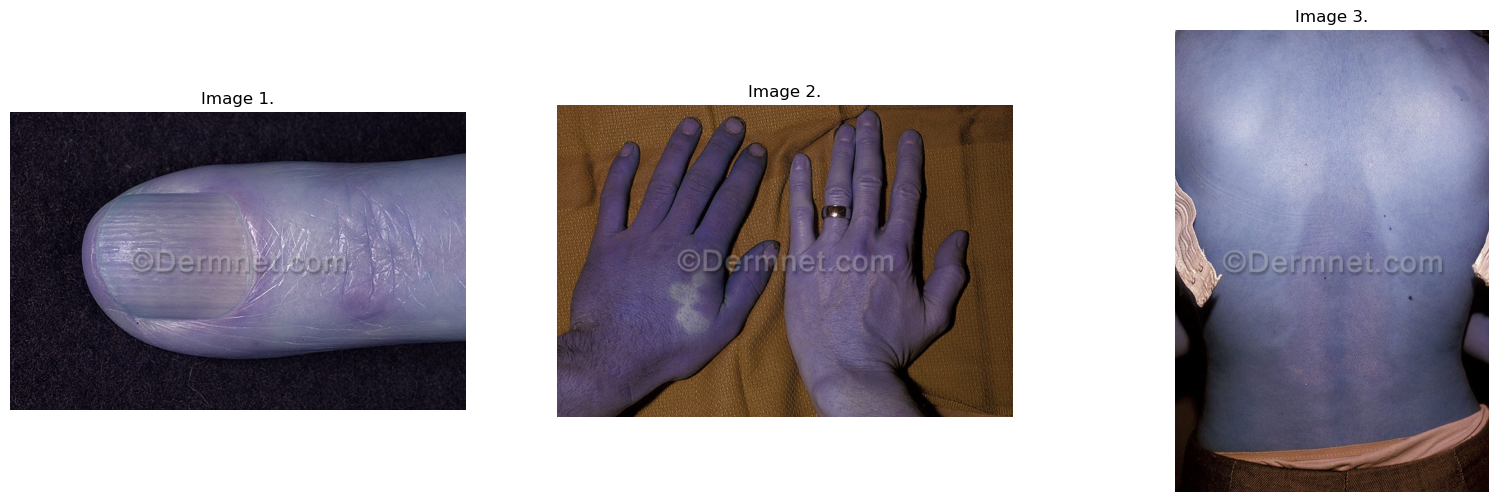

-------------------------------------------------
Visualização de algumas imagens de teste


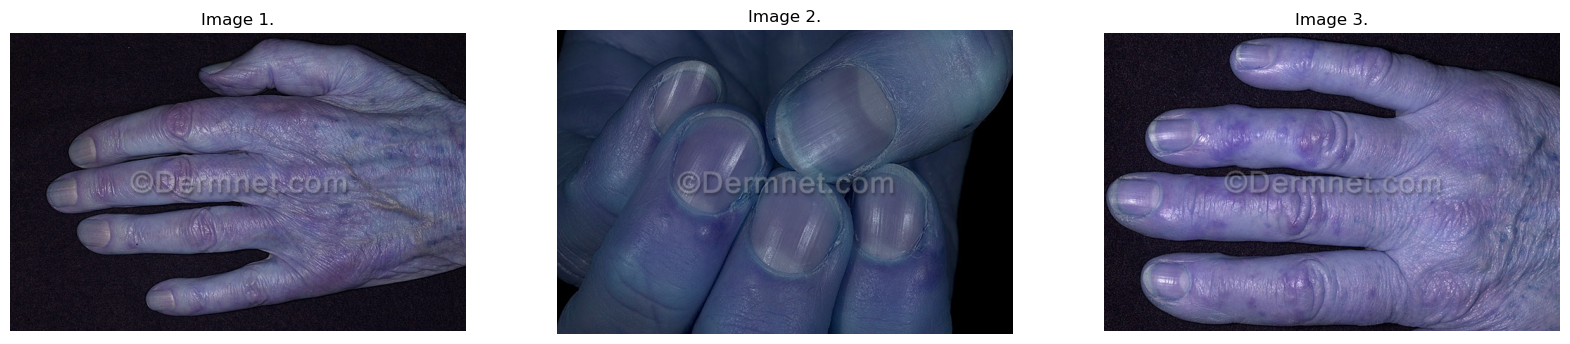

In [6]:
max_images = 3  # Define o número máximo de imagens a serem mostradas
print("Visualização de algumas imagens de treino")
see_array_plt(train_images[labels[1]][:max_images])
plt.show()  # Garante que as imagens de treino sejam exibidas antes do próximo print
print("-------------------------------------------------")
print("Visualização de algumas imagens de teste")
see_array_plt(test_images[labels[1]][:max_images])
plt.show()  # Garante que as imagens de treino sejam exibidas antes do próximo print

# Pré-processamento

## 1.1 Verificação/Eliminação de Imagens Duplicadas

Para ambos os conjuntos(treino e teste) é verificado atravês das hashes previamente criadas se existem hashes duplicadas e consequentemente imagens duplicadas. 
Caso existam, a posição de um elemento do conjunto de duplicação é guardada num array separado para ser posteriormente essa posição ser elimininada do array das imagens, do nome das imagens, e das hashes das imagens. Este processo é efetuado ate o array que guarda os conjuntos de duplicados tenha tamanho 0, para prevenir que elimina imagens que possuam aparecer triplicadas, quadriplicadas, etc.

In [7]:
def find_duplicate_images(images_info):
    hash_to_names = {}
    
    for images_list in images_info.values():
        for image_info in images_list:
            hash_val = image_info['hash']
            image_name = image_info['name']
            if hash_val not in hash_to_names:
                hash_to_names[hash_val] = [image_name]
            else:
                hash_to_names[hash_val].append(image_name)
    
    to_del= []
    for key, value in hash_to_names.items():
        if len(value) <= 1:
            to_del.append(key)
    
    # Remover as chaves que têm apenas um valor associado
    for i in to_del:
        del hash_to_names[i]
        
    return hash_to_names

def see_duplicate(duplicate, folder):
    print(f"Imagens duplicadas no conjunto {folder} agrupados por hash:")
    for hash_val, names in train_duplicate.items():
        print(hash_val)
        for name in names:
            print("-", name)


train_duplicate = find_duplicate_images(train_info)
see_duplicate(train_duplicate, "treino")

print("---------------------------------------------")

test_duplicate = find_duplicate_images(test_info)
see_duplicate(test_info, "teste")

Imagens duplicadas no conjunto treino agrupados por hash:
faa52db08190771cf87f819b6f7c0fafa929a57d7bbf3c9d6ac0946f595ac849
- 05atopicChild0828062.jpg
- 05atopicWrist0828064.jpg
6ad5b27897757d689d043851c0359b0c4608c3d5d568a15946b05315dcb1ba38
- 05AtopicDermHand.jpg
- 05AtopicHand.jpg
- 05AtopicHandq.jpg
1a2c30db137e5f6c87b6dcf6b4e0c37b1112236483526eb249423e13b135689e
- 05AtopicDermHand1.jpg
- 05AtopicHand1q.jpg
59d82d9ecbadbe11e6e78cb21f0b052245cc65f1c849880b67c78721f846ab7e
- 05AtopicWrist.jpg
- 05AtopicWristq.jpg
5e83cac71581c34450fd97f19c2973422b46649fa47bfd080ff77472cde6ad23
- 05pityriasisAlba94-GP3.jpg
- 05pityriasisAlba94.jpg
5eeffc04edb2b1b5ccabfd43d4c59ecbec69f3419b6eb4a46e4f07c2c0f59348
- chilblains-perniosis-32.jpg
- chilblains-perniosis-38.jpg
5ae5aa7e39a9f59d529980566bc410b10fcfefc54e9c1b09fd06e512b3731dba
- lupus-chronic-cutaneous-10.jpg
- lupus-chronic-cutaneous-11.jpg
4af21e01442b95aecf598aef878c170aebd32f7812ba5b0a55c442b223722a5a
- lupus-chronic-cutaneous-12.jpg
- lupus

In [8]:
def remove_duplicates(duplicate, images_info, images):
     # Criar cópias dos dicionários originais para evitar modificar os originais
    new_images_info = {classe: images_info[classe].copy() for classe in images_info}
    new_images = {classe: images[classe].copy() for classe in images}
    
    # Lista para armazenar as chaves a serem removidas dos dicionários
    to_del = {}
    
    # Iterar sobre as duplicatas encontradas
    for hash_val, names in duplicate.items():
        # Manter apenas a primeira ocorrência e remover as outras do dicionário images_info
        for name in names[1:]:
            for classe, values  in images_info.items():
               for pos, value in enumerate(values): 
                    if value['name'] == name and value['hash'] == hash_val:
                        if classe not in to_del:
                            to_del[classe] = []
                        to_del[classe].append(pos)
    
     # Remover os itens dos dicionários images_info e images
    for classe, positions in to_del.items():
        for pos in sorted(positions, reverse=True):
            del new_images_info[classe][pos]
            del new_images[classe][pos]
    
    return new_images_info, new_images

def count_dic(images_dic):
    total = sum(len(images) for images in images_dic.values())
    return total

def see_size_dic(images, info, images2, info2, folder):
    size_images=count_dic(images)
    size_info=count_dic(info)
    size_images2=count_dic(images2)
    size_info2=count_dic(info2)
    
    print(f"Antes da Remoção, conjunto {folder}")
    print(f"--Dicionario imagens:  {size_images}   --Dicionario Info: {size_info}")
    
    print("Vao ser removidas: ")
    print(f"--Dicionario imagens:  {size_images-size_images2}   --Dicionario Info: {size_info-size_info2}")
    
    print(f"Depois da Remoção, conjunto {folder}")
    print(f"--Dicionario imagens:  {size_images2}   --Dicionario Info: {size_info2}")


train_info2, train_images2 = remove_duplicates(train_duplicate, train_info, train_images)
see_size_dic(train_images, train_info,train_images2, train_info2, "Treino" )
train_images=train_images2

print("------------------------------------")

test_info2, test_images2 = remove_duplicates(test_duplicate, test_info, test_images)
see_size_dic(test_images, test_info,test_images2, test_info2, "Test" )
test_images=test_images2

Antes da Remoção, conjunto Treino
--Dicionario imagens:  2989   --Dicionario Info: 2989
Vao ser removidas: 
--Dicionario imagens:  51   --Dicionario Info: 51
Depois da Remoção, conjunto Treino
--Dicionario imagens:  2938   --Dicionario Info: 2938
------------------------------------
Antes da Remoção, conjunto Test
--Dicionario imagens:  749   --Dicionario Info: 749
Vao ser removidas: 
--Dicionario imagens:  3   --Dicionario Info: 3
Depois da Remoção, conjunto Test
--Dicionario imagens:  746   --Dicionario Info: 746


In [9]:
# Eliminar algumas variáveis e funções para libertar memória

#Processamento de dados
#Funções
del delete_folder_if_exists,calculate_hash,load_images_from_folder,print_count_by_class
#Variáveis
del data_train, data_test,max_images

#Eliminação de imagens duplicadas
#Funções
del find_duplicate_images, see_duplicate, remove_duplicates, count_dic, see_size_dic
#Variáveis
del train_info, test_info, train_duplicate, train_info2, train_images2, test_duplicate, test_info2,test_images2


print("Otimização de memória concluída!")

Otimização de memória concluída!


## 1.2 Redimensionar Imagens
Para ambos os conjuntos(treino e teste) o tamanho das imagens é ajustado, cortando a imagem caso esta seja maior que o tamanho pretendido(224x224) ou então aumentada atraves de uma borda.

In [10]:
# Redimensionar imagens
def resize_images(images, new_size):
    resized_images = {}
    for class_label, class_images in images.items():
        resized_images[class_label] = []
        for img in class_images:
            resized_img = cv2.resize(img, new_size)
            resized_images[class_label].append(resized_img)
    return resized_images

# Tamanho desejado para as imagens (250x250)
new_size = (250, 250)

# Redimensionar imagens de treino e teste
train_images_resized = resize_images(train_images, new_size)
test_images_resized = resize_images(test_images, new_size)

# Verificar se as imagens foram redimensionadas corretamente
print("Treino")
for class_label, resized_images in train_images_resized.items():
    print(f"Número de imagens de treino redimensionadas para a classe {class_label}: {len(resized_images)}")

print("Teste")
for class_label, resized_images in test_images_resized.items():
    print(f"Número de imagens de teste redimensionadas para a classe {class_label}: {len(resized_images)}")

Treino
Número de imagens de treino redimensionadas para a classe Atopic Dermatitis Photos: 483
Número de imagens de treino redimensionadas para a classe Lupus and other Connective Tissue diseases: 416
Número de imagens de treino redimensionadas para a classe Melanoma Skin Cancer Nevi and Moles: 453
Número de imagens de treino redimensionadas para a classe Psoriasis pictures Lichen Planus and related diseases: 1378
Número de imagens de treino redimensionadas para a classe Urticaria Hives: 208
Teste
Número de imagens de teste redimensionadas para a classe Atopic Dermatitis Photos: 123
Número de imagens de teste redimensionadas para a classe Lupus and other Connective Tissue diseases: 105
Número de imagens de teste redimensionadas para a classe Melanoma Skin Cancer Nevi and Moles: 115
Número de imagens de teste redimensionadas para a classe Psoriasis pictures Lichen Planus and related diseases: 350
Número de imagens de teste redimensionadas para a classe Urticaria Hives: 53


## 1.3 Normalização

Transformação de cada instancia para um intervalo especifico: [0,1]. 

In [11]:
def normalize_images(images):
    normalized_images_dict = {}
    for class_label, class_images in images.items():
        normalized_images = []
        for img in class_images:
            normalized_img = img / 255.0  # Normalizar os valores dos pixels para o intervalo [0, 1]
            normalized_images.append(normalized_img)
        normalized_images_dict[class_label] = np.array(normalized_images)
    return normalized_images_dict

# Normalizar imagens de treinamento e teste
print("Imagens do treino normalizadas concluídas...")
train_images_normalized = normalize_images(train_images_resized)
for class_label, normalized_images in train_images_normalized.items():
    print(f"Número de imagens de treino normalizadas para a classe {class_label}: {normalized_images.shape}")


print("Imagens do teste normalizadas concluídas...")
test_images_normalized = normalize_images(test_images_resized)
for class_label, normalized_images in test_images_normalized.items():
    print(f"Número de imagens de teste normalizadas para a classe {class_label}: {normalized_images.shape}")

Imagens do treino normalizadas concluídas...
Número de imagens de treino normalizadas para a classe Atopic Dermatitis Photos: (483, 250, 250, 3)
Número de imagens de treino normalizadas para a classe Lupus and other Connective Tissue diseases: (416, 250, 250, 3)
Número de imagens de treino normalizadas para a classe Melanoma Skin Cancer Nevi and Moles: (453, 250, 250, 3)
Número de imagens de treino normalizadas para a classe Psoriasis pictures Lichen Planus and related diseases: (1378, 250, 250, 3)
Número de imagens de treino normalizadas para a classe Urticaria Hives: (208, 250, 250, 3)
Imagens do teste normalizadas concluídas...
Número de imagens de teste normalizadas para a classe Atopic Dermatitis Photos: (123, 250, 250, 3)
Número de imagens de teste normalizadas para a classe Lupus and other Connective Tissue diseases: (105, 250, 250, 3)
Número de imagens de teste normalizadas para a classe Melanoma Skin Cancer Nevi and Moles: (115, 250, 250, 3)
Número de imagens de teste normaliz

## 1.4 Balanceamento dos dados

Para balancear as classes existentes implementamos o Random Over Sampler, este aumenta artificialmente o número de exemplos nas classes minoritárias.


Contagem de amostras antes do balanceamento: {'Atopic Dermatitis Photos': 483, 'Lupus and other Connective Tissue diseases': 416, 'Melanoma Skin Cancer Nevi and Moles': 453, 'Psoriasis pictures Lichen Planus and related diseases': 1378, 'Urticaria Hives': 208}

A inicializar o balanceamento....
A transformar os dados......
-Shape original de X: (2938, 250, 250, 3) Shape original de Y: (2938,)
-Shape balanceado de X: (6890, 187500) -Shape balanceado de Y: (6890,)

Contagem de amostras após o balanceamento: {'Atopic Dermatitis Photos': 1378, 'Lupus and other Connective Tissue diseases': 1378, 'Melanoma Skin Cancer Nevi and Moles': 1378, 'Psoriasis pictures Lichen Planus and related diseases': 1378, 'Urticaria Hives': 1378}


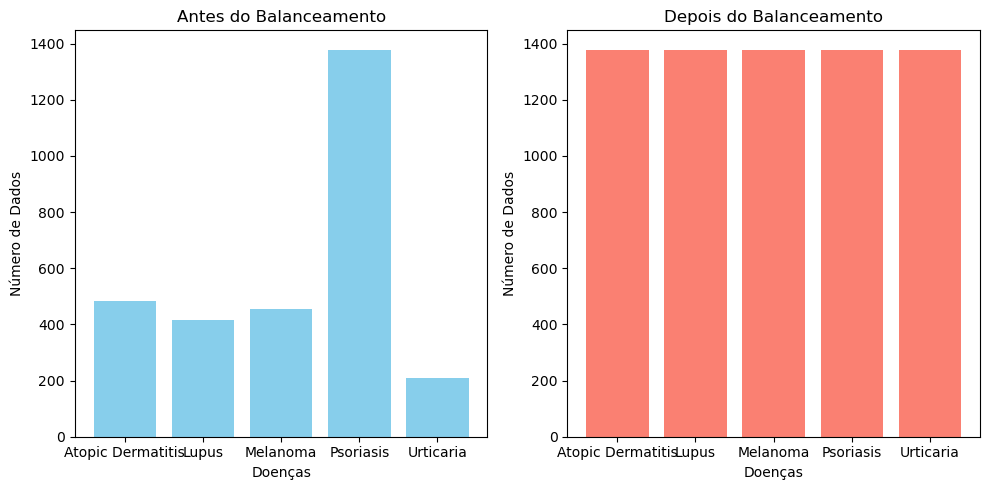

In [13]:
# Função para calcular a contagem de amostras por classe
def count_samples_by_class(data_dict):
    counts = {label: len(samples) for label, samples in data_dict.items()}
    return counts

def create_balanced_image_dict(X_resampled, Y_resampled):
    balanced_train_images = {}
    for i, y in enumerate(Y_resampled):
        x = X_resampled[i].reshape((250, 250, 3))
        if y not in balanced_train_images:
            balanced_train_images[y] = []
        balanced_train_images[y].append(x)
    return balanced_train_images

x_title="Doenças"
y_title="Número de Dados"
short_labels = [' '.join(label.split()[0:2]) if label == "Atopic Dermatitis Photos" else label.split()[0] for label in labels]

# Contagem de amostras antes do balanceamento
before_balancing = count_samples_by_class(train_images_normalized)
print("Contagem de amostras antes do balanceamento:", before_balancing)

# Configuração dos graficos com subplots
plt.figure(figsize=(10, 5))
# Configuração do gráfico antes do balanceamento
plt.subplot(1, 2, 1)
plt.bar(range(len(short_labels)), before_balancing.values(), color='skyblue')
plt.title('Antes do Balanceamento')
plt.xlabel(x_title)
plt.ylabel(y_title)
plt.xticks(range(len(short_labels)), short_labels)
#plt.show()

# Separar as chaves (y) e os valores correspondentes (X)
X = []
Y = []
print("\nA inicializar o balanceamento....")
print("A transformar os dados......")

for y, x in train_images_normalized.items():
    X.extend(x)
    Y.extend([y] * len(x))  # Replicando o rótulo 'y' para cada imagem 'x'

# Converter para numpy arrays
X = np.array(X)
Y = np.array(Y)

# Shape original dos dados
print(f"-Shape original de X: {X.shape} Shape original de Y: {Y.shape}")


#Realizar oversampling apenas nas classes minoritárias após a normalização
oversampler = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = oversampler.fit_resample(X.reshape(-1, np.prod(X.shape[1:])), Y)

# Shape dos dados balanceados
print(f"-Shape balanceado de X: {X_resampled.shape} -Shape balanceado de Y: {Y_resampled.shape}")

#Junção dos dados em dicionario novamente
balanced_train_images = create_balanced_image_dict(X_resampled, Y_resampled)

# Contagem de amostras após o balanceamento
after_balancing = count_samples_by_class(balanced_train_images)
print("\nContagem de amostras após o balanceamento:", after_balancing)

# Configuração do gráfico depois do balanceamento
plt.subplot(1, 2, 2)
plt.bar(range(len(short_labels)), after_balancing.values(), color='salmon')
plt.title('Depois do Balanceamento')
plt.xlabel(x_title)
plt.ylabel(y_title)
plt.xticks(range(len(short_labels)), short_labels)
plt.tight_layout()  # Ajusta automaticamente a disposição dos subplots para evitar sobreposições
plt.show()



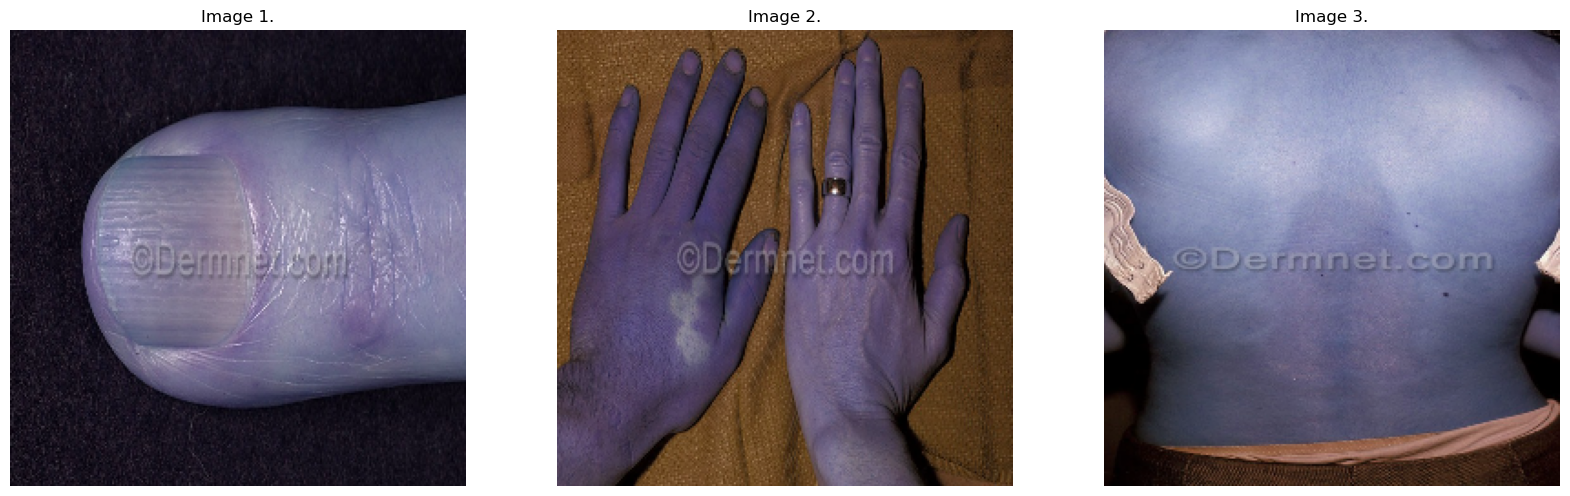

In [21]:
#Visualização de algumas imagens para verificar o formato
see_array_plt(balanced_train_images[labels[1]][:3])

# Guardar os novos dados
Após o pre-processamento estar concluido guardar a nova instancia dos dados para posteriormente utiliza-los para treinar diferentes modelos 

In [22]:
# Função para salvar as imagens em pastas
def save_images_to_folders(data, output_dir):
    print("A guardar imagens.....")
    # Iterar sobre as chaves e valores do dicionário
    for label, images in data.items():
        # Criar o diretório se não existir
        label_dir = os.path.join(output_dir, str(label))
        os.makedirs(label_dir, exist_ok=True)
        
        # Salvar cada imagem no diretório correspondente
        for i, img in enumerate(images):
            img_path = os.path.join(label_dir, f"image_{i}.jpg")
            #cv2.imwrite(img_path, img) #work for treino 
            min_val,max_val=img.min(),img.max()
            img = 255.0*(img - min_val)/(max_val - min_val)
            img = img.astype(np.uint8)
            cv2.imwrite(img_path, img)


save_images_to_folders(balanced_train_images, export_train)
print("Images de treino guardadas com sucesso")
save_images_to_folders(test_images_resized, export_test)
print("Images de teste guardadas com sucesso")

A guardar imagens.....
Images de treino guardadas com sucesso
A guardar imagens.....
Images de teste guardadas com sucesso
